# Image Recognition using TensorFlow and Keras

This lab will help guide you in using TensorFlow and Keras. TensorFlow is an open source machine learning framework developed by Google. It similifies the process of building neural networks for deep learning. 

You can find additinal resources on using Tensorflow at https://www.tensorflow.org/

For this example we will use TensorFlow with the MNIST dataset. The MNIST dataset is database of handwritten digits. The associated number to each image is provided in the dataset. This problem is a multiclass classification which we will use TensorFlow to solve without the need to n-1 or n binary classification problems.

We start by importing TensorFlow libarary in python, given that it is installed. To install in Notebook type !pip install tensorflow. Additionally, we need to import Keras which is a high level API to build and train deep learning models.

In [83]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

Now that we imported TensorFlow library and Keras, we can start using them. Keras contains a version of the MNIST dataset which we will use in this lab. The next cell will read the MNIST dataset.

In [84]:
data = tf.keras.datasets.cifar10

After loading the data, we will split it into training and testing.

In [85]:
(x_train, y_train), (x_test, y_test) = data.load_data()

We will now plot the images to see what we are working with.

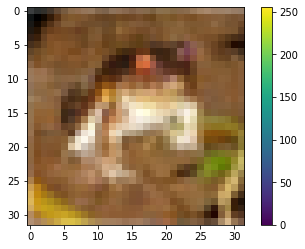

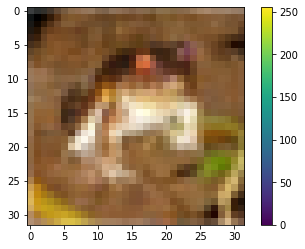

In [86]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We notice that the image is 255 x 255 pixels. As a result, we will scale the values to range between 0 and 1, and thus we will divide by 255.0.

In [87]:
x_train, x_test = x_train / 255.0, x_test / 255.0

We then check if our scaling worked.

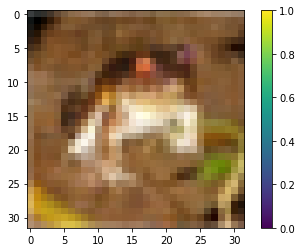

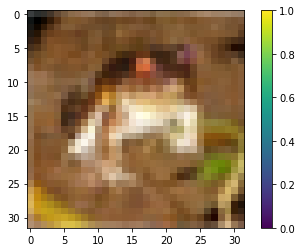

In [88]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before we build our deep learning model, let us explore what the data looks like. For that, we will plot our training images with their associated classes or digit.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


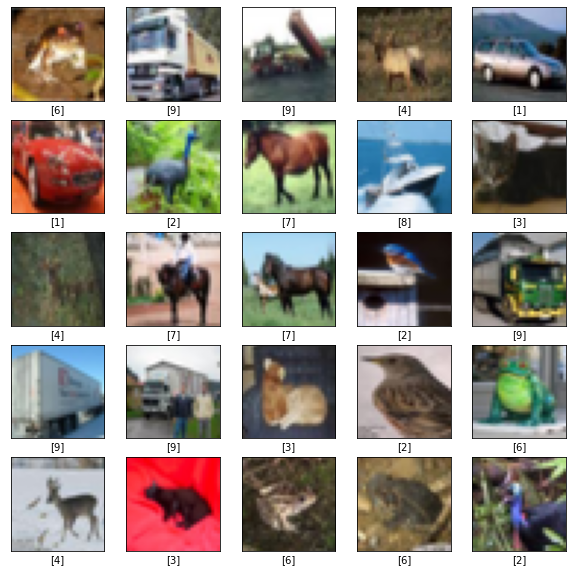

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


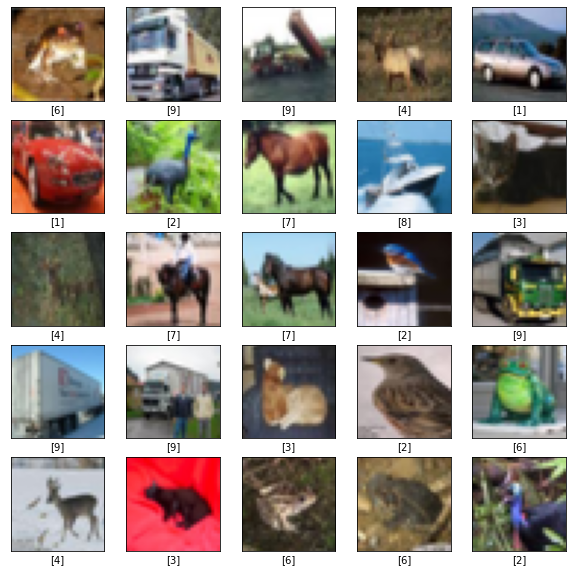

In [89]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Following our data exploration, we will now build our model which requires us to configure its layers, and then compile it. For this problem we will have 3 layers: an input layer, a hidden layer, and output layer. We will build a dense network, where all the neurons are connected to the next layer.

In [90]:
x_train[0].shape

(32, 32, 3)

(32, 32, 3)

In [91]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer tf.keras.layers.Flatten converts the images from a 3d-array to a 1d-array of 32 * 32 * 3 = 3072 pixels. Basically, we are unstacking rows of pixels and lining them up.</p>
<p>We then add two tf.keras.layers.Dense layers which are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second layer is a 10-node softmax layer representing the 10 classes.

Before we train our model, we need to compile it by defining our optimizer, loss function, and the metric used to monitor the training steps.

In [92]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

After compiling our model, we train the model with our training data and by defining the number of epochs.

In [68]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8931 - accuracy: 0.3223
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7281 - accuracy: 0.3852
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6675 - accuracy: 0.4054
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6320 - accuracy: 0.4204
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6049 - accuracy: 0.4280


Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8944 - accuracy: 0.3169
Epoch 2/5
1227/1563 [======================>.......] - ETA: 1s - loss: 1.7542 - accuracy: 0.3739

You notice that for each epoch, the model prints out the accuracy while it trains. After done training, we will now evaluate our model on the test set.

In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.6431 - accuracy: 0.4148
Test accuracy: 0.4147999882698059


### Adjust the number of hidden layers to three.

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8696 - accuracy: 0.3151
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6989 - accuracy: 0.3888
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6295 - accuracy: 0.4127
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5791 - accuracy: 0.4330
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5361 - accuracy: 0.4502


In [71]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5298 - accuracy: 0.4600
Test accuracy: 0.46000000834465027


Training accuracy is higher than testing data, suggesting overfitting in more hidden layers.




###   Increase the number of neurons

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(320, activation=tf.nn.relu),
    keras.layers.Dense(320, activation=tf.nn.relu),
    keras.layers.Dense(320, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8458 - accuracy: 0.3283
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6684 - accuracy: 0.3976
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5953 - accuracy: 0.4262
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5407 - accuracy: 0.4432
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5009 - accuracy: 0.4599


In [73]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.5458 - accuracy: 0.4560
Test accuracy: 0.4560000002384186


Increase the number of neurons in each hidden layers increase the testing accuracy.

### Change activation function from relu to sigmoid

In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(320, activation=tf.nn.sigmoid),
    keras.layers.Dense(320, activation=tf.nn.sigmoid),
    keras.layers.Dense(320, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.9504 - accuracy: 0.2780
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8139 - accuracy: 0.3368
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7633 - accuracy: 0.3564
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7289 - accuracy: 0.3708
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7094 - accuracy: 0.3832


In [75]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.7466 - accuracy: 0.3724
Test accuracy: 0.3723999857902527


I changed rectified linear unit activation function(RELU) to sigmoid activation function, and found that accuracy decrease. Also, the test accuracy is lower than trainning accuracy, implying an overfitting.

### Increase epochs to 10

From above, we know that incrase the number of hidden layer can increase the accuracy, so here, I increased the number of hidden layer to 5 with 200 neurons. 

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8793 - accuracy: 0.3123
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7136 - accuracy: 0.3818
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6419 - accuracy: 0.4083
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5854 - accuracy: 0.4308
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5405 - accuracy: 0.4455
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5075 - accuracy: 0.4590
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4819 - accuracy: 0.4668
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4594 - accuracy: 0.4754
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4350 - accuracy: 0.4838
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [77]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 1.5048 - accuracy: 0.4708
Test accuracy: 0.4708000123500824


This is the best model we got, with 5 hidden layers, 200 neurons in each hidden layers, relu activation function and 10 epochs. 

Now, let us take a look at what a neural network predicts.

In [78]:
predictions = model.predict(x_test)

In [79]:
predictions[0]

array([0.03420441, 0.09937931, 0.01372933, 0.31524456, 0.06805283,
       0.26787832, 0.11222506, 0.01869794, 0.04664932, 0.0239389 ],
      dtype=float32)

We can see the probabilities which the neural network output for our first prediction at all the output layers. To know which class it predicted we apply argmax to the outputs.

In [80]:
np.argmax(predictions[0])

3

We now validate what is the actual digit for the first test element.

In [81]:
y_test[0]

array([3], dtype=uint8)

They match, meaning a successful prediction

We now plot a sample of the test set with their respective predicted class and associated probability.

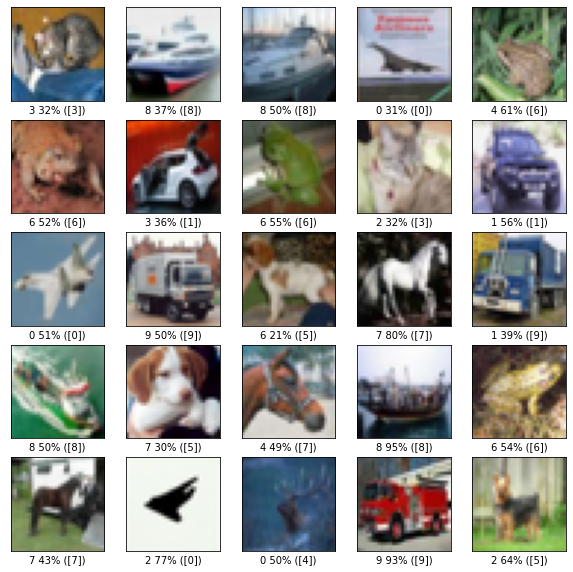

In [82]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions[i]), y_test[i]))
plt.show()

### Summarize  findings regarding the different iterations and any insights gained

The first model is single hidden layer model, with 128 neurons. Activation function is relu. The testing accuracy we got is 0.41. 

The first adjustment I made is increasing the number of hidden layer to three, with 128 neurons each. Testing accuracy increase to 0.45. Thus, it looks like increasing the number of hidden layers helps.

The second adjustment I made is increasing the number of neurons., and testing accuracy increase to 0.46.

The third adjustment I made is changing activation function of relu to sigmoid.Both activation functions are nonlinear functions. Sigmoid has response from 0 to 1. When X goes either end of the sigmoid function, the Y values tend to respond less, making gradient to be small in this region. This is so called 'vanishing gradients'. And sigmoid is more computational expensive then relu. On the other hand, relu has zero response when x <0, this is another problem called dying ReLu problem. There are pros and cons for both method. In our work, ReLu works better. 

The last adjustment I made is increasing epochs. We know that increasing the number of epochs overfits CNN. So we couldn't keep increasing epochs. In this work, I increased epochs from 5 to 10, and we see that both training and testing accuracy increase. Herein, 10 epochs do not overfit in our model. 